In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("titanic.xlsx")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Type,Age_range,Age_group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Medium,21-25,Young Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Medium,36-40,Adult


In [19]:
df["indivisual_sum"] = df["Fare"]/df['Family_size']

In [23]:
df.rename(columns={'indivisual_fare': 'individual_fare'}, inplace=True)

In [24]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Type,Age_range,Age_group,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Medium,21-25,Young Adult,3.62500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Medium,36-40,Adult,35.64165


In [25]:
df["individual_fare"] = df["individual_fare"].round(0)

In [26]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Type,Age_range,Age_group,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Medium,21-25,Young Adult,4.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Medium,36-40,Adult,36.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,26-30,Young Adult,8.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Medium,31-35,Adult,27.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,31-35,Adult,8.0


In [27]:
df["individual_fare"] = df["individual_fare"].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [30]:
df['individual_fare'].isnull().sum()

1

In [31]:
df['individual_fare'].dropna()

0         4.0
1        36.0
2         8.0
3        27.0
4         8.0
        ...  
1304      8.0
1305    109.0
1306      7.0
1307      8.0
1308      7.0
Name: individual_fare, Length: 1308, dtype: float64

In [33]:
df['individual_fare'] = df['individual_fare'].dropna().astype(int)

In [45]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Type,Age_range,Age_group,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Medium,21-25,Young Adult,4.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Medium,36-40,Adult,36.0


In [38]:
df['individual_fare'].dtype

dtype('float64')

In [69]:
def plot_survival(df, col):
    
    # Calculate count and percentage
    grouped = df.groupby(col)['Survived'].sum()
    percent = df.groupby(col)['Survived'].mean() * 100

    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    # ----- BAR CHART -----
    bars = axes[0].bar(grouped.index, grouped.values, color='skyblue', edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Total Survivors')
    axes[0].set_title(f'Survived Count by {col}')

    # Add labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        axes[0].text(
            bar.get_x() + bar.get_width()/2,
            height,
            str(int(height)),
            ha='center', va='bottom', fontweight='bold'
        )

     # ----- LINE CHART -----
    axes[1].plot(grouped.index, grouped.values, marker='o', linestyle='-', color='green')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Total Survivors')
    axes[1].set_title(f'Survivor Trend by {col}')
    axes[1].set_xticks(grouped.index)

    # Add labels on each point
    for x, y in zip(grouped.index, grouped.values):
        axes[1].text(x, y, str(int(y)), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # ----- SUMMARY TABLE -----
    summary_df = pd.DataFrame({
        'Survived': grouped.values,
        'Survival Percent (%)': percent.round(2).values}, index=grouped.index).sort_values(by='Survived', ascending=False)
    
    return summary_df

# Survived vs passenger class Analysis

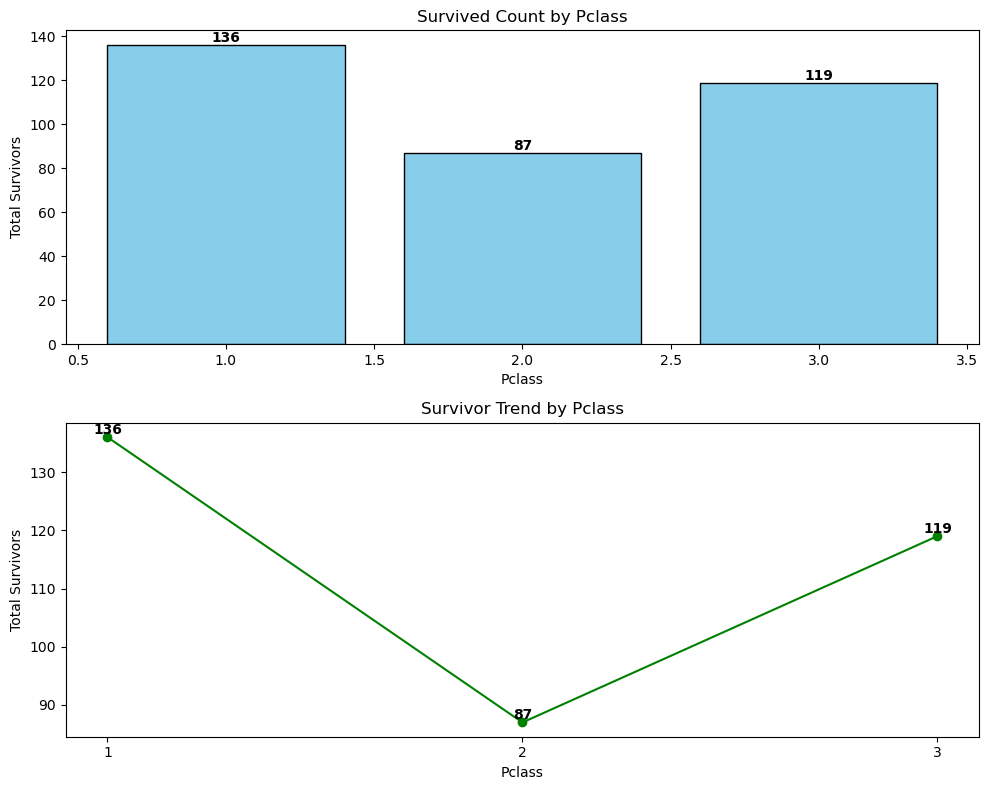

,Survived,Survival Percent (%)
Pclass,,
1,136.0,62.96
3,119.0,24.24
2,87.0,47.28


In [70]:
plot_survival(df, "Pclass")

# Survived vs Gender Analysis 

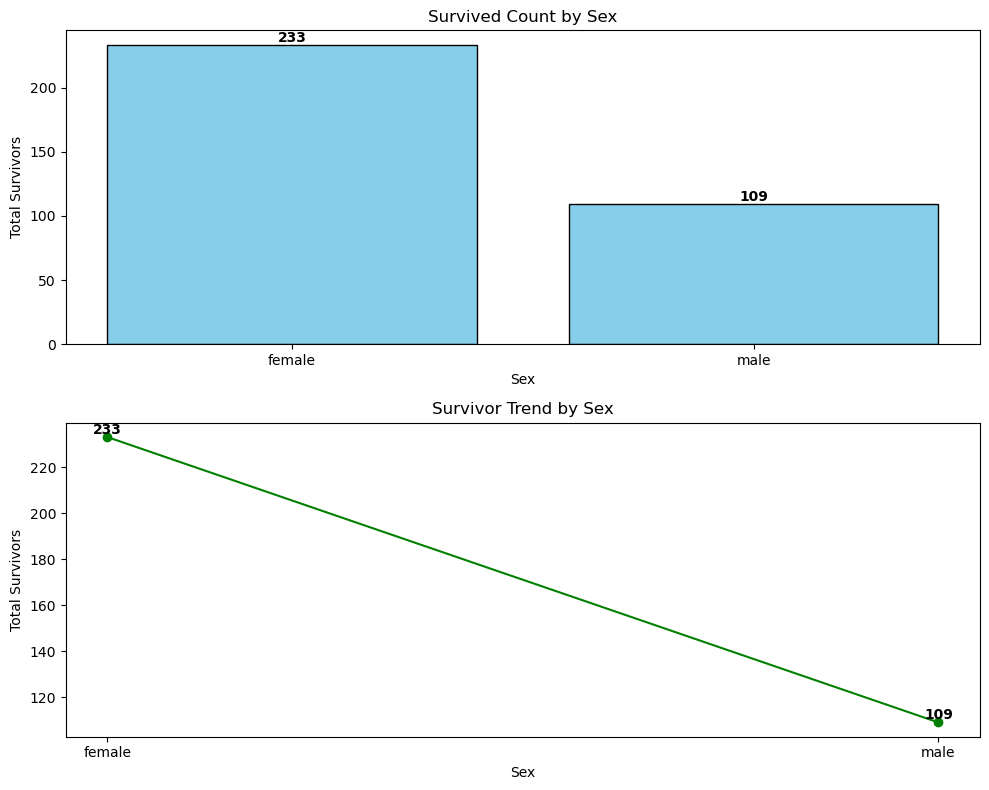

,Survived,Survival Percent (%)
Sex,,
female,233.0,74.20
male,109.0,18.89


In [66]:
plot_survival(df, "Sex")

# Survived vs Age Group Analysis 

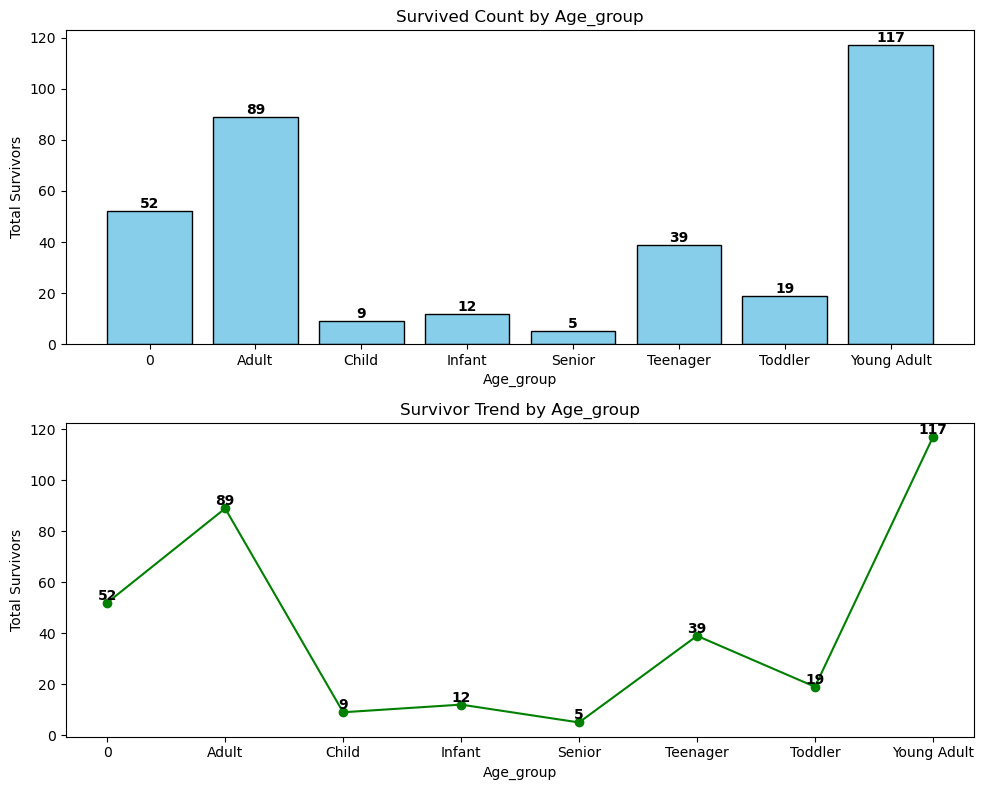

,Survived,Survival Percent (%)
Age_group,,
Young Adult,117.0,37.26
Adult,89.0,41.78
0,52.0,29.21
Teenager,39.0,41.05
Toddler,19.0,63.33
Infant,12.0,85.71
Child,9.0,36.00
Senior,5.0,22.73


In [71]:
plot_survival(df, "Age_group")

# Survived vs Age Range Analysis 

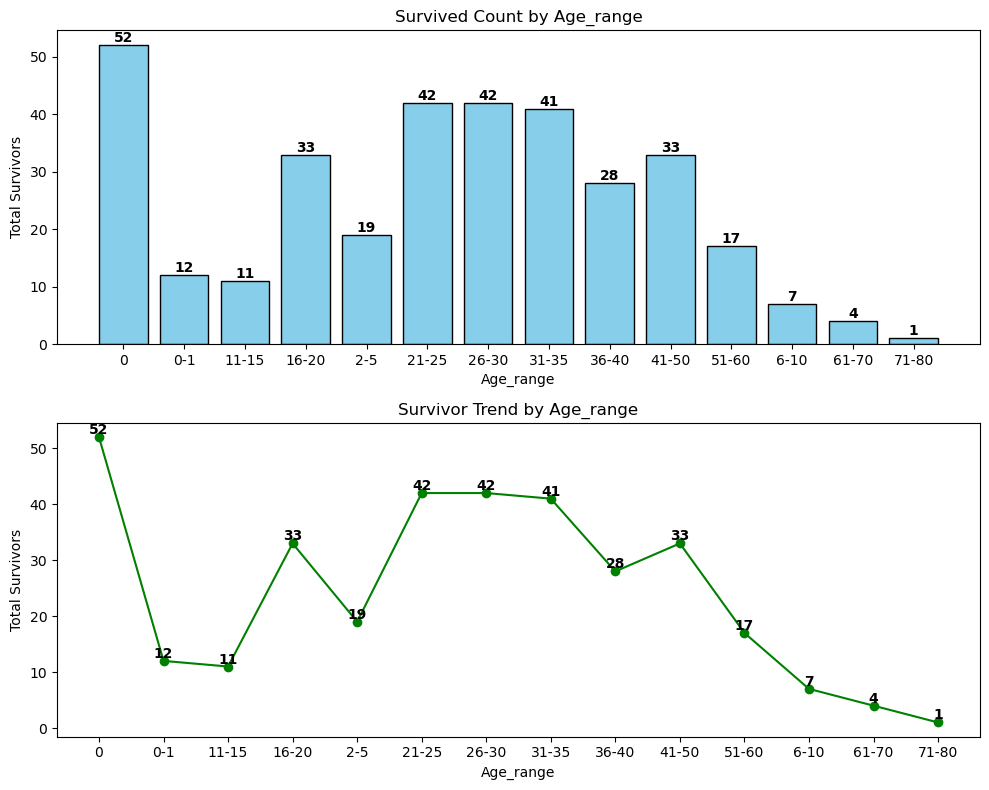

,Survived,Survival Percent (%)
Age_range,,
0,52.0,28.42
21-25,42.0,34.71
26-30,42.0,38.89
31-35,41.0,47.67
16-20,33.0,34.38
41-50,33.0,39.29
36-40,28.0,41.79
2-5,19.0,63.33
51-60,17.0,40.48


In [72]:
plot_survival(df, "Age_range")

In [73]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Type,Age_range,Age_group,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Medium,21-25,Young Adult,4.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Medium,36-40,Adult,36.0


# Survived vs Family Size Analysis 

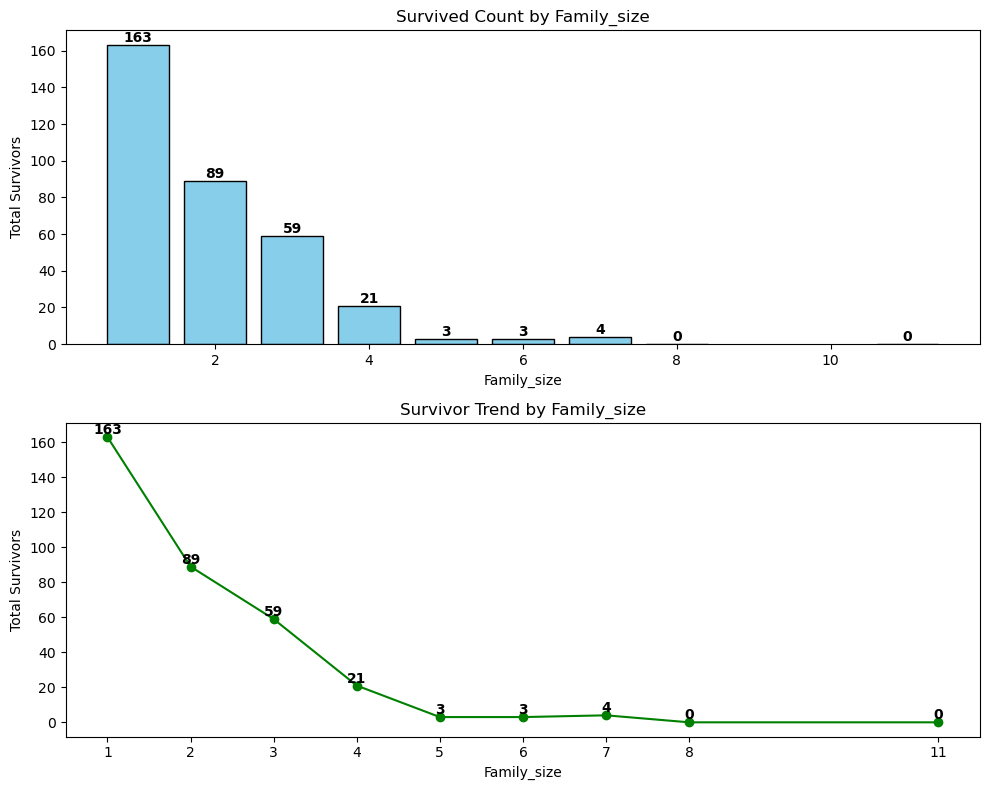

,Survived,Survival Percent (%)
Family_size,,
1,163.0,30.35
2,89.0,55.28
3,59.0,57.84
4,21.0,72.41
7,4.0,33.33
5,3.0,20.00
6,3.0,13.64
8,0.0,0.00
11,0.0,0.00


In [74]:
plot_survival(df, "Family_size")

# Survived vs Family Type Analysis 

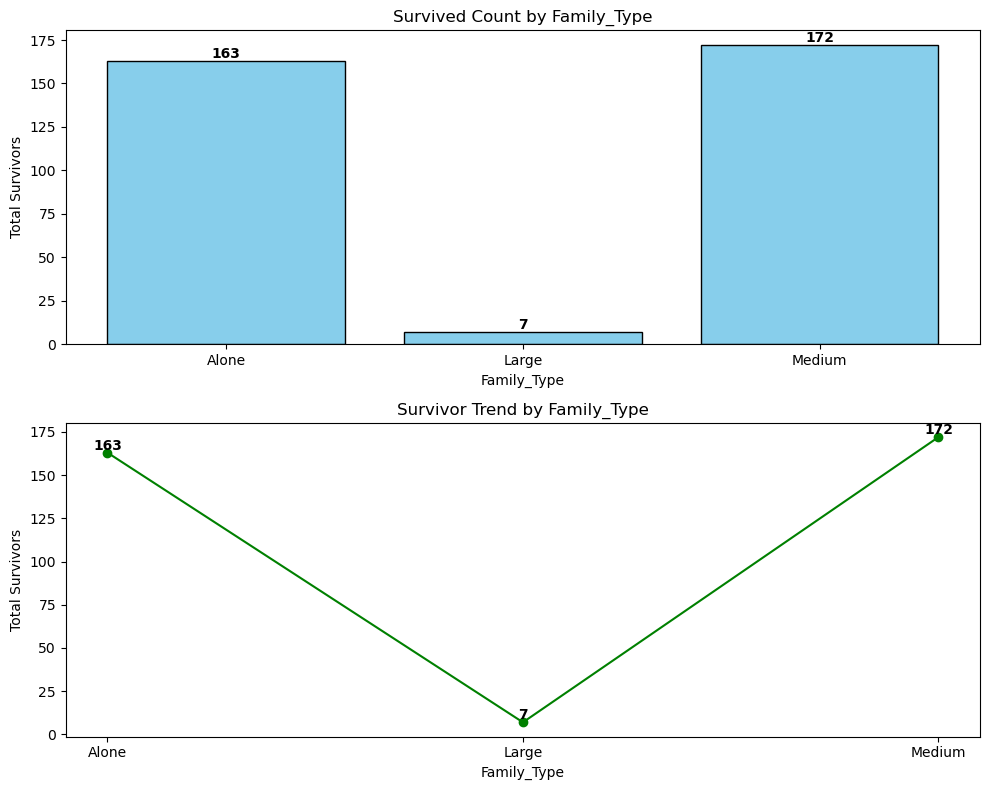

,Survived,Survival Percent (%)
Family_Type,,
Medium,172.0,56.03
Alone,163.0,30.35
Large,7.0,14.89


In [75]:
plot_survival(df, "Family_Type")